___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-3 (RNN)<br><br>Product Amount Forecast by Time<br><h1>

# Dataset Info

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

# Import Libraries

In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

# Indest Data

In [162]:
df = pd.read_csv('/content/sample_data/Frozen_Dessert_Production.csv',
                index_col='DATE',
                parse_dates=True
                )

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Change the column name as "Production"
2. Plot your data and see its seasonalty

In [163]:
df.head()

,IPN31152N
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573 entries, 1972-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IPN31152N  573 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


In [165]:
df.columns = ['Production']

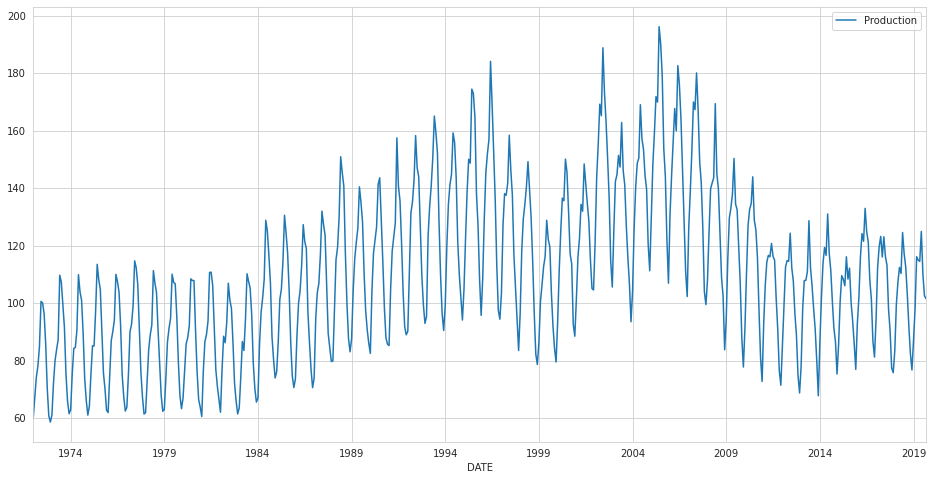

In [166]:
df.plot(figsize=(16,8))

# Preprocessing of Data

## Train Test Split

In [167]:
len(df)

573

In [168]:
test_size =40

In [169]:
test_ind = len(df)- test_size
test_ind

533

In [170]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [171]:
train

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2016-01-01,92.811
2016-02-01,101.974
2016-03-01,116.179


In [172]:
test

,Production
DATE,
2016-06-01,132.987
2016-07-01,124.851
2016-08-01,121.332
2016-09-01,108.036
2016-10-01,101.384
2016-11-01,86.665
2016-12-01,81.257
2017-01-01,94.245
2017-02-01,112.388


In [173]:
df.dtypes

Production    float64
dtype: object

## Scaling

In [174]:
from sklearn.preprocessing import MinMaxScaler

In [175]:
scaler=MinMaxScaler()

In [176]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Time Series Generator

In [177]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [178]:
length = 20
batch_size = 1
generator = TimeseriesGenerator(train_scaled, train_scaled, length = length, batch_size = batch_size)

In [179]:
len(generator)

513

In [180]:
generator[0]

(array([[[0.00947104],
         [0.06108982],
         [0.11326273],
         [0.14145625],
         [0.18982663],
         [0.30495972],
         [0.30154406],
         [0.27416065],
         [0.19736841],
         [0.08532665],
         [0.01561588],
         [0.        ],
         [0.01774221],
         [0.09850931],
         [0.15590133],
         [0.18358944],
         [0.20878908],
         [0.37150354],
         [0.3542551 ],
         [0.29817568]]]), array([[0.23973867]]))

In [181]:
X, y = generator[0]

# Modelling & Model Performance

## with "tanh" activation function

In [182]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [183]:
train_scaled.shape

(533, 1)

In [184]:
n_features = train_scaled.shape[1]

In [185]:
model = Sequential()
model.add(LSTM(100, activation = 'tanh', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(50, activation = 'tanh'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [186]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_17 (LSTM)              (None, 20, 100)           40800     
                                                                 
 lstm_18 (LSTM)              (None, 50)                30200     
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


EarlyStopping and Validation Generator

In [187]:
from tensorflow.keras.callbacks import EarlyStopping

In [188]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5,restore_best_weights = True)

In [189]:
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = batch_size)

In [190]:
len(validation_generator)

20

In [191]:
model.fit(x = generator,
          epochs = 120,
          validation_data = validation_generator,
          callbacks = [early_stop])

Epoch 1/120
513/513 [==============================] - 15s 21ms/step - loss: 0.0165 - val_loss: 0.0046
Epoch 2/120
513/513 [==============================] - 9s 18ms/step - loss: 0.0068 - val_loss: 0.0026
Epoch 3/120
513/513 [==============================] - 10s 18ms/step - loss: 0.0049 - val_loss: 0.0023
Epoch 4/120
513/513 [==============================] - 10s 19ms/step - loss: 0.0044 - val_loss: 0.0019
Epoch 5/120
513/513 [==============================] - 10s 19ms/step - loss: 0.0039 - val_loss: 0.0033
Epoch 6/120
513/513 [==============================] - 10s 19ms/step - loss: 0.0036 - val_loss: 0.0020
Epoch 7/120
513/513 [==============================] - 10s 19ms/step - loss: 0.0034 - val_loss: 0.0022
Epoch 8/120
513/513 [==============================] - 10s 19ms/step - loss: 0.0037 - val_loss: 0.0032
Epoch 9/120
513/513 [==============================] - 9s 18ms/step - loss: 0.0035 - val_loss: 0.0020


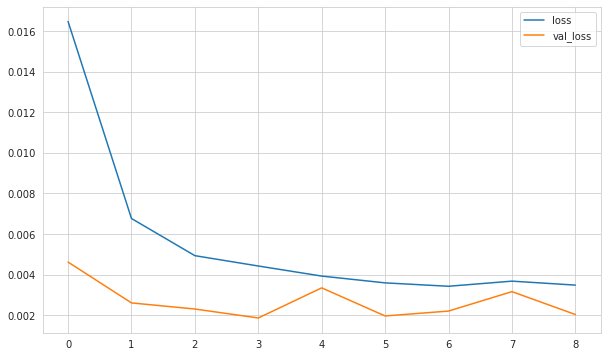

In [192]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

### Evaluation on Test Data

In [193]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [194]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [195]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

In [196]:
predictions_scaled

[array([0.47597134], dtype=float32),
 array([0.44506276], dtype=float32),
 array([0.3867613], dtype=float32),
 array([0.31541008], dtype=float32),
 array([0.26230815], dtype=float32),
 array([0.24788606], dtype=float32),
 array([0.27281916], dtype=float32),
 array([0.32329002], dtype=float32),
 array([0.38417375], dtype=float32),
 array([0.44465518], dtype=float32),
 array([0.4909308], dtype=float32),
 array([0.5172406], dtype=float32),
 array([0.5136018], dtype=float32),
 array([0.4785522], dtype=float32),
 array([0.41753605], dtype=float32),
 array([0.3479835], dtype=float32),
 array([0.30055028], dtype=float32),
 array([0.2899135], dtype=float32),
 array([0.3172486], dtype=float32),
 array([0.36855766], dtype=float32)]

In [197]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: 0.5210055109877045 
mae: 0.06997382651242375 
mse: 0.007682594392394449 
rmse: 0.08765041010967632


### Inverse Transformation and Comparing

In [198]:
predictions = scaler.inverse_transform(predictions_scaled)

In [199]:
compare = test[:20]

In [200]:
compare['Predictions'] = predictions

In [201]:
compare

,Production,Predictions
DATE,,
2016-06-01,132.987,124.112
2016-07-01,124.851,119.862
2016-08-01,121.332,111.845
2016-09-01,108.036,102.033
2016-10-01,101.384,94.731
2016-11-01,86.665,92.748
2016-12-01,81.257,96.176
2017-01-01,94.245,103.117
2017-02-01,112.388,111.489


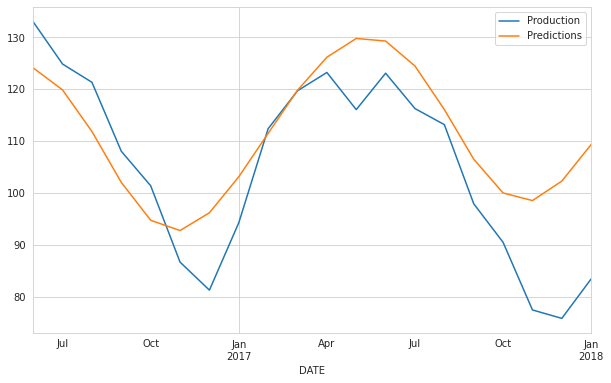

In [202]:
compare.plot()

## with "relu" activation function

In [203]:
train_scaled.shape

(533, 1)

In [204]:
n_features = train_scaled.shape[1]

In [205]:
model = Sequential()
model.add(LSTM(100, activation = 'relu', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(50, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [206]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_19 (LSTM)              (None, 20, 100)           40800     
                                                                 
 lstm_20 (LSTM)              (None, 50)                30200     
                                                                 
 dense_8 (Dense)             (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


EarlyStopping and Validation Generator

In [207]:
from tensorflow.keras.callbacks import EarlyStopping

In [208]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5,restore_best_weights = True)

In [209]:
len(validation_generator)

20

In [210]:
model.fit(x = generator,
          epochs = 120,
          validation_data = validation_generator,
          callbacks = [early_stop])

Epoch 1/120
513/513 [==============================] - 12s 19ms/step - loss: 0.0316 - val_loss: 0.0118
Epoch 2/120
513/513 [==============================] - 11s 22ms/step - loss: 0.0296 - val_loss: 0.0098
Epoch 3/120
513/513 [==============================] - 9s 18ms/step - loss: 0.0138 - val_loss: 0.0020
Epoch 4/120
513/513 [==============================] - 9s 17ms/step - loss: 0.0104 - val_loss: 0.0027
Epoch 5/120
513/513 [==============================] - 9s 17ms/step - loss: 0.0074 - val_loss: 0.0060
Epoch 6/120
513/513 [==============================] - 9s 18ms/step - loss: 0.0066 - val_loss: 0.0036
Epoch 7/120
513/513 [==============================] - 9s 18ms/step - loss: 0.0054 - val_loss: 0.0031
Epoch 8/120
513/513 [==============================] - 9s 18ms/step - loss: 0.0048 - val_loss: 0.0022


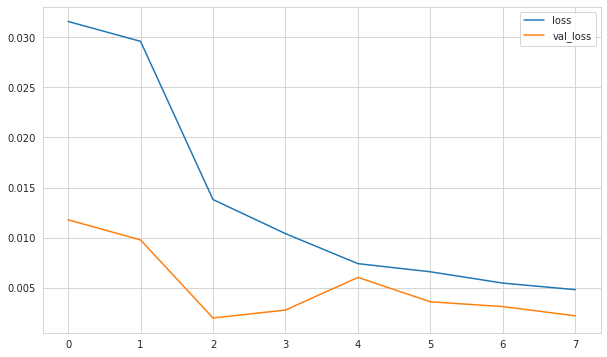

In [211]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

### Evaluation on Test Data

In [212]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [213]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

In [214]:
predictions_scaled

[array([0.4290451], dtype=float32),
 array([0.40435964], dtype=float32),
 array([0.36661786], dtype=float32),
 array([0.32157868], dtype=float32),
 array([0.28469166], dtype=float32),
 array([0.2587397], dtype=float32),
 array([0.2662694], dtype=float32),
 array([0.31193006], dtype=float32),
 array([0.37181425], dtype=float32),
 array([0.43108103], dtype=float32),
 array([0.47176024], dtype=float32),
 array([0.48278126], dtype=float32),
 array([0.46672872], dtype=float32),
 array([0.42955884], dtype=float32),
 array([0.38057598], dtype=float32),
 array([0.3326854], dtype=float32),
 array([0.29624385], dtype=float32),
 array([0.27932197], dtype=float32),
 array([0.30267578], dtype=float32),
 array([0.3568473], dtype=float32)]

In [215]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: 0.5651228191685473 
mae: 0.06441546590683239 
mse: 0.006974996722248853 
rmse: 0.0835164458190652


### Inverse Transformation and Comparing

In [216]:
predictions = scaler.inverse_transform(predictions_scaled)

In [217]:
compare = test[:20]

In [218]:
compare['Predictions'] = predictions

In [219]:
compare

,Production,Predictions
DATE,,
2016-06-01,132.987,117.659
2016-07-01,124.851,114.265
2016-08-01,121.332,109.075
2016-09-01,108.036,102.881
2016-10-01,101.384,97.809
2016-11-01,86.665,94.240
2016-12-01,81.257,95.276
2017-01-01,94.245,101.555
2017-02-01,112.388,109.789


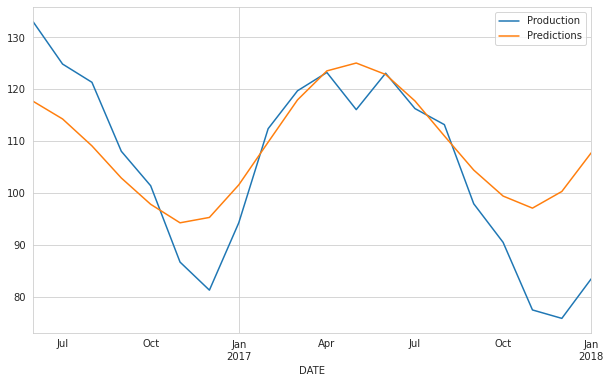

In [220]:
compare.plot()

In [221]:
eval_metrics(compare.Production,compare.Predictions)

r2_score: 0.5651228191685476 
mae: 8.858021937165557 
mse: 131.89769505262728 
rmse: 11.48467217871835


# Retrain and Forecasting

Select activation function providing a better score, create your final model with full data, forecast for the next 12 months, and plot this forecast.

In [222]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [223]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = batch_size)

In [224]:
model = Sequential()
model.add(LSTM(100, activation = 'tanh', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(50, activation = 'tanh'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

model.fit(x = generator, epochs=15)

Epoch 1/15
553/553 [==============================] - 16s 20ms/step - loss: 0.0210
Epoch 2/15
553/553 [==============================] - 10s 18ms/step - loss: 0.0073
Epoch 3/15
553/553 [==============================] - 10s 18ms/step - loss: 0.0052
Epoch 4/15
553/553 [==============================] - 10s 19ms/step - loss: 0.0043
Epoch 5/15
553/553 [==============================] - 10s 18ms/step - loss: 0.0036
Epoch 6/15
553/553 [==============================] - 10s 18ms/step - loss: 0.0035
Epoch 7/15
553/553 [==============================] - 10s 18ms/step - loss: 0.0034
Epoch 8/15
553/553 [==============================] - 10s 18ms/step - loss: 0.0037
Epoch 9/15
553/553 [==============================] - 10s 19ms/step - loss: 0.0031
Epoch 10/15
553/553 [==============================] - 10s 18ms/step - loss: 0.0034
Epoch 11/15
553/553 [==============================] - 10s 18ms/step - loss: 0.0033
Epoch 12/15
553/553 [==============================] - 10s 18ms/step - loss: 0.0032
E

In [234]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)
    
    # store prediction
    forecast.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

In [235]:
forecast = scaler.inverse_transform(forecast)

In [236]:
forecast

array([[ 88.1526478 ],
       [ 81.99801487],
       [ 83.7440263 ],
       [ 93.12571491],
       [104.16542178],
       [112.91878971],
       [120.71581843],
       [127.38851727],
       [130.17203342],
       [127.06104382],
       [118.43009423],
       [106.58440415],
       [ 94.72297686],
       [ 87.1666292 ],
       [ 89.88492196],
       [102.9134688 ],
       [116.86578617],
       [126.6441592 ],
       [136.1901419 ],
       [145.15436394]])

In [237]:
df

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263


In [238]:
forecast_index = pd.date_range(start = '2019-10-01', periods = length, freq = 'MS')

In [239]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ['Forecast'])

In [240]:
forecast_df

,Forecast
2019-10-01,88.153
2019-11-01,81.998
2019-12-01,83.744
2020-01-01,93.126
2020-02-01,104.165
2020-03-01,112.919
2020-04-01,120.716
2020-05-01,127.389
2020-06-01,130.172
2020-07-01,127.061


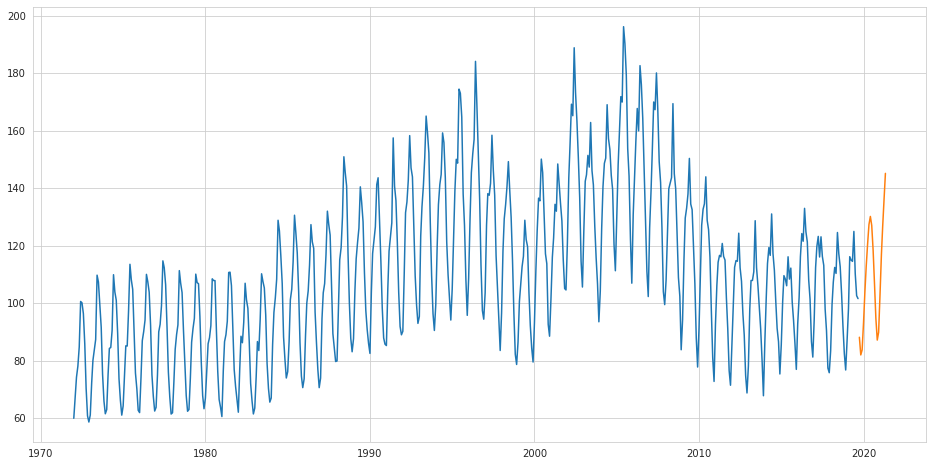

In [241]:
plt.figure(figsize = (16, 8))
plt.plot(df.index, df['Production'])
plt.plot(forecast_df.index, forecast_df['Forecast'])

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___